## Анализ данных на Python

### Домашнее задание 1
### «Введение в Python. NumPy, Pandas, Matplotlib. Графический анализ данных»

---

---

### Python

__Задание 1 (5 баллов):__ Напишите функцию `find_intercept`, которая на вход принимает значения коэффициентов $k$, $b$, $p$ и $m$ прямых:
$$
y = kx + b, \\
y = px + m,
$$
и возвращает `tuple` с координатами точки пересечения этих прямых (то есть в формате `(x, y)`). Если прямые параллельны (подумайте или вспомните, при каком условии это так), функция должна возвращать сообщение о том, что прямые параллельны и точек пересечения нет. Приведите пример работы функции для пересекающихся и для параллельных прямых.

In [70]:
def find_intercept(k, b, p, m):
    # Проверка на параллельность
    if k == p and b != m:
        return "Прямые параллельны и точек пересечения нет"
    # Проверка не лежат они друг на друге
    if k == p and b == m:
        return "Бесконечное множество пересечений"

    # Вычисление координат точки пересечения
    x = (m - b) / (k - p)
    y = k * x + b

    return (x, y)


In [71]:
# Прямые пересекаются
example1 = find_intercept(2, -1, -3, 1)
print("Пример 1 (пересекающиеся прямые):", example1)

Пример 1 (пересекающиеся прямые): (0.4, -0.19999999999999996)


In [72]:
# Прямые параллельны
example2 = find_intercept(2, 3, 2, 5)
print("Пример 2 (параллельные прямые):", example2)

Пример 2 (параллельные прямые): Прямые параллельны и точек пересечения нет


In [73]:
# Прямые лежат друг на друге
example3 = find_intercept(2, 5, 2, 5)
print("Пример 3 (прямые лежат друг на друге):", example3)

Пример 3 (прямые лежат друг на друге): Бесконечное множество пересечений


__Задание 2 (5 баллов):__ Напишите функцию, которая на вход принимает предложение в строковом формате, и выдаёт словарь, где ключами являются буквы русского алфавита, а значениями – количество раз, которое буква встретилась в тексте. Рассматривайте заглавные и строчные буквы как одну букву (для этого может пригодиться метод `.lower()`). Знаки препинания игнорируйте. Приведите один пример работы функции.

In [74]:
def count_letters(sentence):
    # Русский алфавит
    alphabet = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
    
    # Преобразуем строку в нижний регистр
    sentence = sentence.lower()
    
    # Инициализируем словарь с ключами из русского алфавита и значениями 0
    letter_count = {letter: 0 for letter in alphabet} # Все символы кроме русскогт алфавита будут игнорироваться
    
    # Подсчитываем количество встреч каждой буквы
    for c in sentence:
        if c in alphabet:
            letter_count[c] += 1
    
    # Удаляем буквы, у которых значение == 0
    letter_count = {k: v for k, v in letter_count.items() if v > 0}
    
    return letter_count


In [75]:
example = "Напишите функцию, которая на вход принимает предложение в строковом формате, и выдаёт словарь, где ключами являются буквы русского алфавита, а значениями – количество раз, которое буква встретилась в тексте."
letter_count = count_letters(example)
print(letter_count)

{'а': 16, 'б': 2, 'в': 12, 'г': 2, 'д': 4, 'е': 13, 'ё': 1, 'ж': 1, 'з': 2, 'и': 13, 'к': 10, 'л': 7, 'м': 5, 'н': 7, 'о': 16, 'п': 3, 'р': 10, 'с': 9, 'т': 14, 'у': 4, 'ф': 3, 'х': 1, 'ц': 1, 'ч': 3, 'ш': 1, 'ы': 2, 'ь': 2, 'ю': 3, 'я': 5}


### NumPy

_(В этой части нельзя использовать циклы)._

__Задание 1 (5 баллов):__ Напишите функцию, которая на вход принимает два массива `numpy` и выводит:
- среднее значение, максимальный и минимальный элементы каждого массива;
- длину каждого массива;
- если возможно, покоординатную сумму элементов массивов.
Функция не должна ничего возвращать. 

Вывод функции должен быть реализован через функцию `print()` в следующем формате (не обязательно использовать только одну функцию `print()`):

In [76]:
import numpy as np

np.random.seed() # Чтобы каждый раз был другой результат при рандоме

def array_info(arr1, arr2):
    # Средние значения
    mean1 = np.mean(arr1)
    mean2 = np.mean(arr2)
    
    # Максимальные значения
    max1 = np.max(arr1)
    max2 = np.max(arr2)
    
    # Минимальные значения
    min1 = np.min(arr1)
    min2 = np.min(arr2)
    
    # Длины массивов
    len1 = arr1.size
    len2 = arr2.size
    
    # Если размеры совпадают, то можно найти сумма массивов
    if arr1.shape == arr2.shape:
        sum_arrays = arr1 + arr2
    else:
        sum_arrays = "Невозможно вычислить сумму массивов разной длинны"
    
    # Вывод результатов
    print(f"""
Среднее 1: {mean1}
Среднее 2: {mean2}
MAX 1: {max1}
MAX 2: {max2}
MIN 1: {min1}
MIN 2: {min2}
LEN 1: {len1}
LEN 2: {len2}
SUM: {sum_arrays}
""")

Приведите пример работы функции для векторов одинаковой длины и для векторов разной длины.

In [77]:
# Одинаковая длина 
arr1 = np.array([1, 2, 3, 4, 5])
arr2 = np.array([7, 1, 5, 19, 2])
array_info(arr1, arr2)


Среднее 1: 3.0
Среднее 2: 6.8
MAX 1: 5
MAX 2: 19
MIN 1: 1
MIN 2: 1
LEN 1: 5
LEN 2: 5
SUM: [ 8  3  8 23  7]



In [78]:
# Разная длина
arr3 = np.array([[1, 7], [3, 4]])
arr4 = np.array([5, 6])
array_info(arr3, arr4)


Среднее 1: 3.75
Среднее 2: 5.5
MAX 1: 7
MAX 2: 6
MIN 1: 1
MIN 2: 5
LEN 1: 4
LEN 2: 2
SUM: Невозможно вычислить сумму массивов разной длинны



__Задание 2 (10 баллов):__ Напишите функцию, которая принимает на вход два массива `numpy` одинаковой длины, и возвращает список со всеми элементами этих двух массивов у которых совпадает и индекс, и значение. 

Например, для массивов $(1, 2, 3, 4)$ и $(1, 4, 3, 2)$, функция должна вернуть $[1, 3]$.

In [79]:
def matching_elements(arr1, arr2):
    # Проверка, что массивы одинаковой длины
    if arr1.shape != arr2.shape:
        return "Массивы должны быть одинаковой длины"
    
    # Находим совпадающие элементы
    matches = arr1 == arr2
    
    # Извлекаем элементы, где совпадает и индекс, и значение
    result = arr1[matches]
    
    return result.tolist()


In [80]:
arr1 = np.array([1, 2, 3, 4])
arr2 = np.array([1, 4, 3, 2])

matching_result = matching_elements(arr1, arr2)
print("Элементы этих двух массивов у которых совпадает и индекс, и значение:", matching_result)

Элементы этих двух массивов у которых совпадает и индекс, и значение: [1, 3]


__Задание 3 (5 баллов):__ Напишите функцию, которая принимает на вход матрицу `numpy` произвольного размера и возвращает все её элементы, кратные 3. 

In [81]:
def krat_3(matrix):
    # Находим элементы, кратные 3
    el_krat_3 = matrix[matrix % 3 == 0]
    
    return el_krat_3.tolist()


In [82]:
matrix = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [12, 17, 98]])
krat_result = krat_3(matrix)
print("Элементы, кратные 3:", krat_result)

Элементы, кратные 3: [3, 6, 9, 12]


__Задание 4 (5 баллов):__ Напишите функцию, которая принимает на вход матрицу `numpy` размера $4\times4$ и возвращает все элементы её третьего столбца, не равные элементам её второй строки.

In [83]:
def third_col_not_in_second_row(matrix):
    # Извлекаем третий столбец и вторую строку
    third_column = matrix[:, 2]
    second_row = matrix[1, :]
    
    # Найдем элементы третьего столбца, не равные элементам второй строки
    result = [el for el in third_column if el not in second_row]
    
    return result


In [84]:
matrix = np.array([[1, 2, 3, 4],
                   [5, 6, 7, 8],
                   [9, 10, 11, 12],
                   [13, 14, 15, 16]])
                   
result = third_col_not_in_second_row(matrix)
print("Элементы третьего столбца, не равные элементам второй строки:", result)

Элементы третьего столбца, не равные элементам второй строки: [3, 11, 15]


### Pandas

В данном разделе вам предстоит изучить датасет __"Fish market"__, в котором содержатся данные по характеристикам различных видов рыб.

Датасет представлен на [kaggle.com](https://www.kaggle.com) – пожалуй, самом популярном сайте участия в соревнованиях по машинному обучению.

[Описание и переменные]

Описание переменных на русском:
- `Species` – название вида рыбы на английском.
- `Weight` – вес рыбы в граммах.
- `Length1` – длина рыбы по вертикали (от головы к хвосту) в см.
- `Length2` – длина рыбы по диагонали (от головы к хвосту) в см.
- `Length3` – ширина рыбы по горизонтали (по спине) в см.
- `Width` – ширина рыбы по диагонали (по спине) в см.
- `Height` –  высота рыбы (по боковой стороне) в см.

Предсказываемой переменной является переменная `Weight`.


__Задание 1 (5 баллов):__ В оригинальном датасете переменные названы довольно неинформативно. Используя команду `a.columns = ` (где `a` – переменная, хранящая датасет), присвойте переменным следующие более информативные названия: Species, Weight, VerLen, DiagVerLen, HorLen, DiagHorLen, Height. 

In [85]:
import pandas as pd
file_path = 'Fish.csv'
data = pd.read_csv(file_path)

# Переименовываем столбцов
data.columns = ['Species', 'Weight', 'VerLen', 'DiagVerLen', 'HorLen', 'DiagHorLen', 'Height']
data.head()

,Species,Weight,VerLen,DiagVerLen,HorLen,DiagHorLen,Height
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


__Задание 2 (5 баллов):__ Определите, сколько уникальных видов рыбы содержится в датасете.

In [86]:
len(data['Species'].unique()) # Размер списка с уникальными видами рыбы

7

__Задание 3 (5 баллов):__ Определите наиболее часто встречающийся в датасете вид рыбы. 

In [87]:
data['Species'].value_counts().max()

56

__Задание 4.1 (10 баллов):__ Постройте диаграмму рассеяния объясняющей переменной (по оси Y) против переменной `Height`. Какой вид зависимости наблюдается (линейная / нелинейная, прямая / обратная)? Приведите возможное объяснение наблюдаемой зависимости.

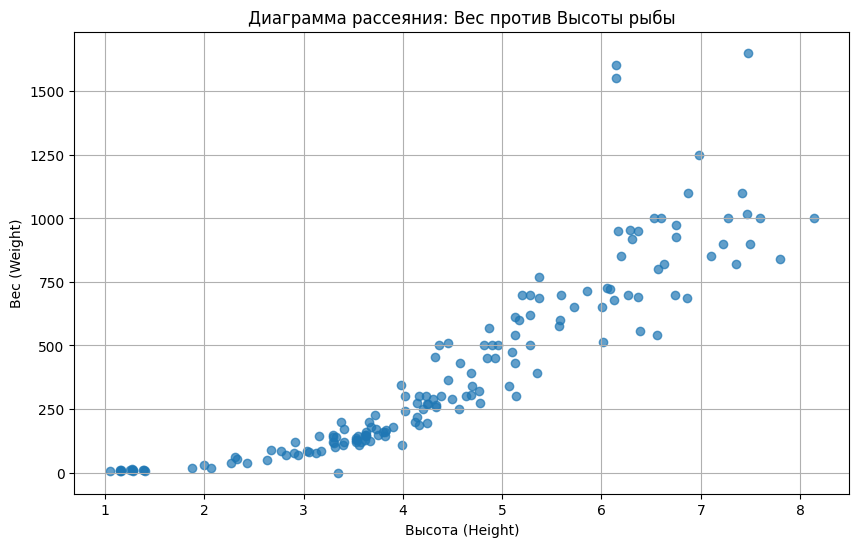

In [88]:
import matplotlib.pyplot as plt

# Построение диаграммы рассеяния
plt.figure(figsize=(10, 6))
plt.scatter(data['Height'], data['Weight'], alpha=0.7) # Строим диаграмму рассеивания 
plt.title('Диаграмма рассеяния: Вес против Высоты рыбы') # Название диаграммы
plt.xlabel('Высота (Height)')
plt.ylabel('Вес (Weight)')
plt.grid(True) # Для эстетики решетку добавим
plt.show()


Прямая линейная зависимость. Высота рыбы пропорциональна её общей массе. Чем выше рыба, тем больше её общий объём -> вес.

__Задание 4.2 (5 баллов):__ По построенной диаграмме рассеяния определите возможное число аутлайеров (выбросов).

In [89]:
# Метод на основе межквартильного размаха (IQR)

# Вычисляем межквартильный размах для переменной Weight
Q1 = data['Weight'].quantile(0.25)
Q3 = data['Weight'].quantile(0.75)
IQR = Q3 - Q1

# Вычисляем границы для определения выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Находим выбросы
outliers = data[(data['Weight'] < lower_bound) | (data['Weight'] > upper_bound)]
outliers

,Species,Weight,VerLen,DiagVerLen,HorLen,DiagHorLen,Height
142,Pike,1600.0,56.0,60.0,64.0,9.600,6.144
143,Pike,1550.0,56.0,60.0,64.0,9.600,6.144
144,Pike,1650.0,59.0,63.4,68.0,10.812,7.480


In [90]:
len(outliers) # Число выбросов

3

### Matplotlib

__Задание 1 (10 баллов):__ Постройте на одном графике следующие функции:
- $y = x^7 + 2x^6 - 13x^5 - 22x^2 + x - 3$
- $y = \frac{1}{x} + \frac{1}{x^2} + \frac{1}{x^3} + \frac{1}{x^4}$

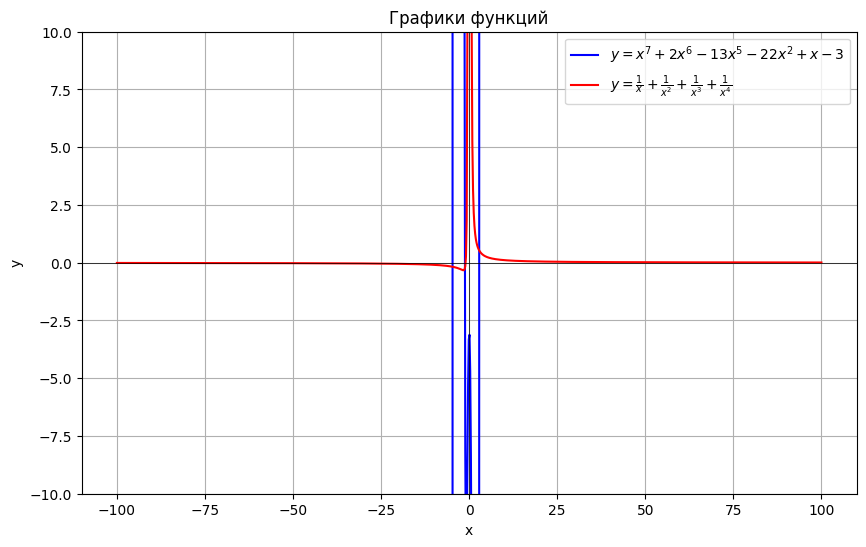

In [91]:
def func1(x):
    return x**7 + 2*x**6 - 13*x**5 - 22*x**2 + x - 3

def func2(x):
    return 1/x + 1/x**2 + 1/x**3 + 1/x**4

# Генерируем значения x для построения графика
x = np.linspace(-100, 100, 1000) 
y1 = func1(x)
y2 = func2(x)


plt.figure(figsize=(10, 6)) # Строим граффик

# График функции 1
plt.plot(x, y1, label=r'$y = x^7 + 2x^6 - 13x^5 - 22x^2 + x - 3$', color='blue')

# График функции 2
plt.plot(x, y2, label=r'$y = \frac{1}{x} + \frac{1}{x^2} + \frac{1}{x^3} + \frac{1}{x^4}$', color='red')

# Настройка графика
plt.title('Графики функций') # Название графика
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black', linewidth=0.5)  # Горизонтальная ось
plt.axvline(0, color='black', linewidth=0.5)  # Вертикальная ось
plt.grid(True) # Ставим сетку
plt.legend() # Ставим легенду графика
plt.ylim(-10, 10)  # Ограничиваем y для лучшей визуализации

plt.show()

__Задание 2 (10 баллов):__ Решите графически систему уравнений:
$$
\begin{cases}
2x + 3y = 5, \\
-10x + 10y = 0
\end{cases}
$$

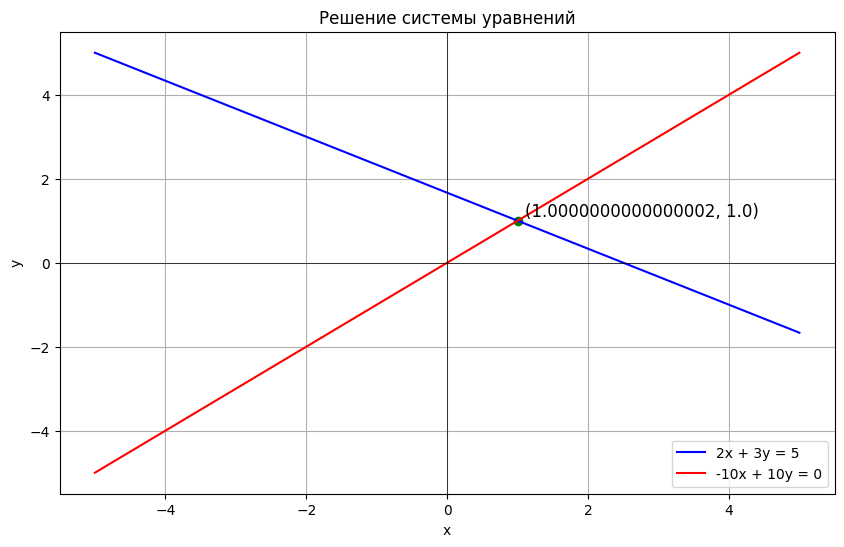

In [92]:
def equation1(x):
    return (5 - 2*x) / 3

def equation2(x):
    return x

# Генерируем значения x для построения графика
x = np.linspace(-5, 5, 400)

# Строим графики уравнений
plt.figure(figsize=(10, 6))

plt.plot(x, equation1(x), label='2x + 3y = 5', color='blue')
plt.plot(x, equation2(x), label='-10x + 10y = 0', color='red')

# Находим и подписываем точку пересечения
intersection_x , intersection_y = find_intercept(-2/3, 5/3, 1, 0) # Используем нашу функцию find_intercept
plt.scatter(intersection_x, intersection_y, color='green', marker='o')  # Ставим точку
plt.text(intersection_x + 0.1, intersection_y, f'({intersection_x}, {intersection_y})', fontsize=12, verticalalignment='bottom') # Подписываем точку

# Настройка графика
plt.title('Решение системы уравнений') # Название графика
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black', linewidth=0.5) # Горизонтальная ось
plt.axvline(0, color='black', linewidth=0.5) # Вертикальная ось
plt.grid(True) # Ставим сетку
plt.legend() # Ставим легенду графика


plt.show()


Мы создали функцию, находящую координаты точек пересечения 2 прямых; функцию, считающую количество символов русского алфавита в предложении. С помощью Numpy мы смогли найти различные статистические данные, научились разным методам взаимодействия с матрицами и массивами. Мы загрузили и проанализировали датасет, содержащий данные о характеристиках различных видов рыб. Мы определили количество уникальных видов рыб в датасете и выявили наиболее часто встречающийся вид. Для анализа зависимости между весом рыбы и её высотой была построена диаграмма рассеяния, что позволило визуально оценить характер этой зависимости(прямая линейная). 

В ходе выполнения данной работы я получил навыки обработки и визуализации данных с использованием библиотек Pandas и Matplotlib, а также научился проводить базовый анализ данных и интерпретировать результаты визуализации.